In [7]:
import pandas as pd

BATCH_SIZE = 16
IMG_SIZE = 224
SEED = 42
input_path = "dataset/ChestXray NIH"

df = (pd.read_csv(f'{input_path}/preprocessed_data.csv')
      .drop(columns=["Unnamed: 0"])
      .astype(int)
      [["No Finding", "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass", "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema", "Emphysema", "Fibrosis", "Pleural_Thickening", "Hernia"]])
display(df.head())

,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
len(df)

112120

In [9]:
import numpy as np

df_co_occurrence = df.T.dot(df)
df_co_occurrence

,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
No Finding,60361,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Atelectasis,0,11559,370,3275,3264,739,590,262,774,1223,221,424,220,496,40
Cardiomegaly,0,370,2776,1063,587,102,108,41,49,169,127,44,52,111,7
Effusion,0,3275,1063,13317,4000,1254,912,269,996,1287,593,359,188,849,21
Infiltration,0,3264,587,4000,19894,1159,1546,605,946,1221,981,449,345,750,33
Mass,0,739,102,1254,1159,5782,906,71,431,610,129,215,117,452,25
Nodule,0,590,108,912,1546,906,6331,70,341,428,131,115,166,411,10
Pneumonia,0,262,41,269,605,71,70,1431,41,123,340,23,11,48,3
Pneumothorax,0,774,49,996,946,431,341,41,5302,223,33,747,80,289,9
Consolidation,0,1223,169,1287,1221,610,428,123,223,4667,162,103,79,251,4


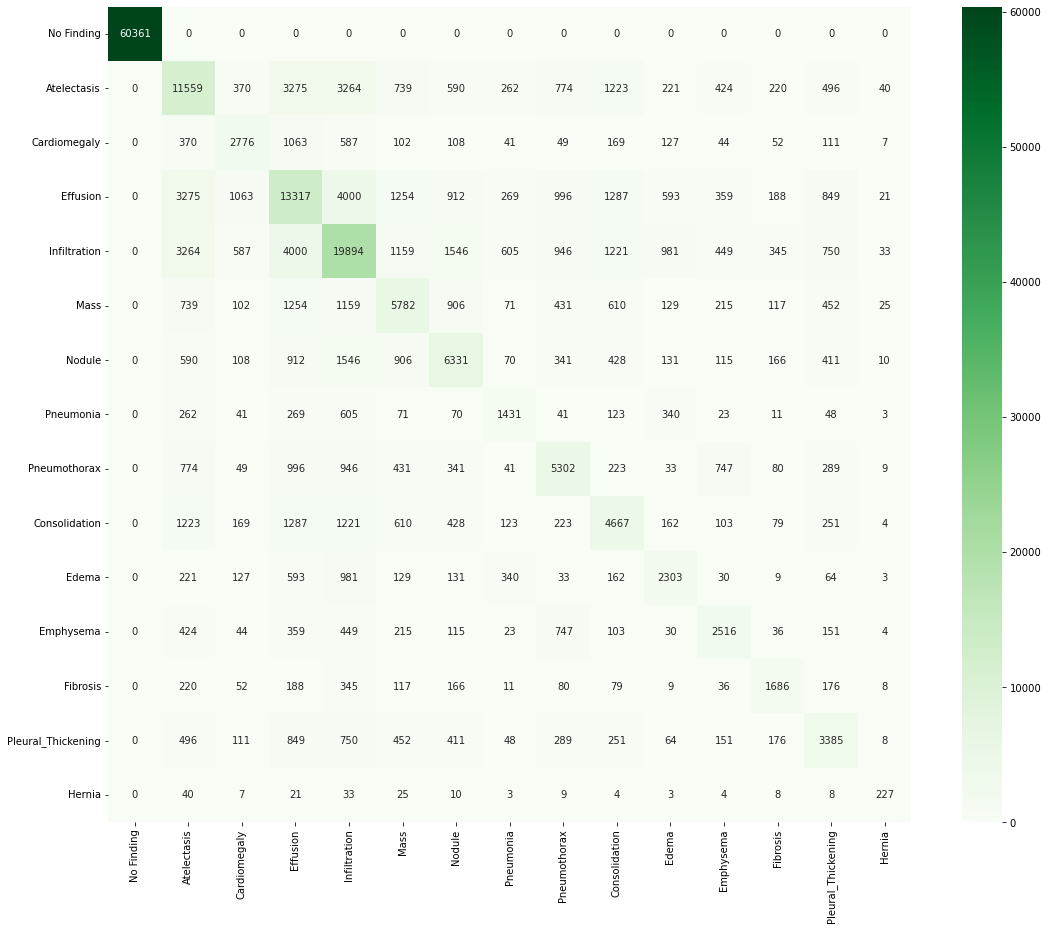

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))
confusion_metrics_plot =  sns.heatmap(df_co_occurrence,
            cmap="Greens",
            annot=True,
            label=True,
            fmt="d")
fig = confusion_metrics_plot.get_figure()
fig.savefig("Multi_Label_Co-occurence_Metrics.png") 
plt.show();

In [22]:
diagonal = np.diagonal(df_co_occurrence)
with np.errstate(divide='ignore', invalid='ignore'):
    percentage = np.nan_to_num(np.true_divide(df_co_occurrence, diagonal[:, None]))
percentage

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 3.20096894e-02, 2.83329008e-01,
        2.82377368e-01, 6.39328662e-02, 5.10424777e-02, 2.26663206e-02,
        6.69608098e-02, 1.05805000e-01, 1.91193010e-02, 3.66813738e-02,
        1.90327883e-02, 4.29102864e-02, 3.46050696e-03],
       [0.00000000e+00, 1.33285303e-01, 1.00000000e+00, 3.82925072e-01,
        2.11455331e-01, 3.67435159e-02, 3.89048991e-02, 1.47694524e-02,
        1.76512968e-02, 6.08789625e-02, 4.57492795e-02, 1.58501441e-02,
        1.87319885e-02, 3.99855908e-02, 2.52161383e-03],
       [0.00000000e+00, 2.45926260e-01, 7.98227829e-02, 1.00000000e+00,
        3.00367951e-01, 9.41653526e-02, 6.84838928e-02, 2.01997447e-02,
        7.47916197e-02, 9.66433882e-0

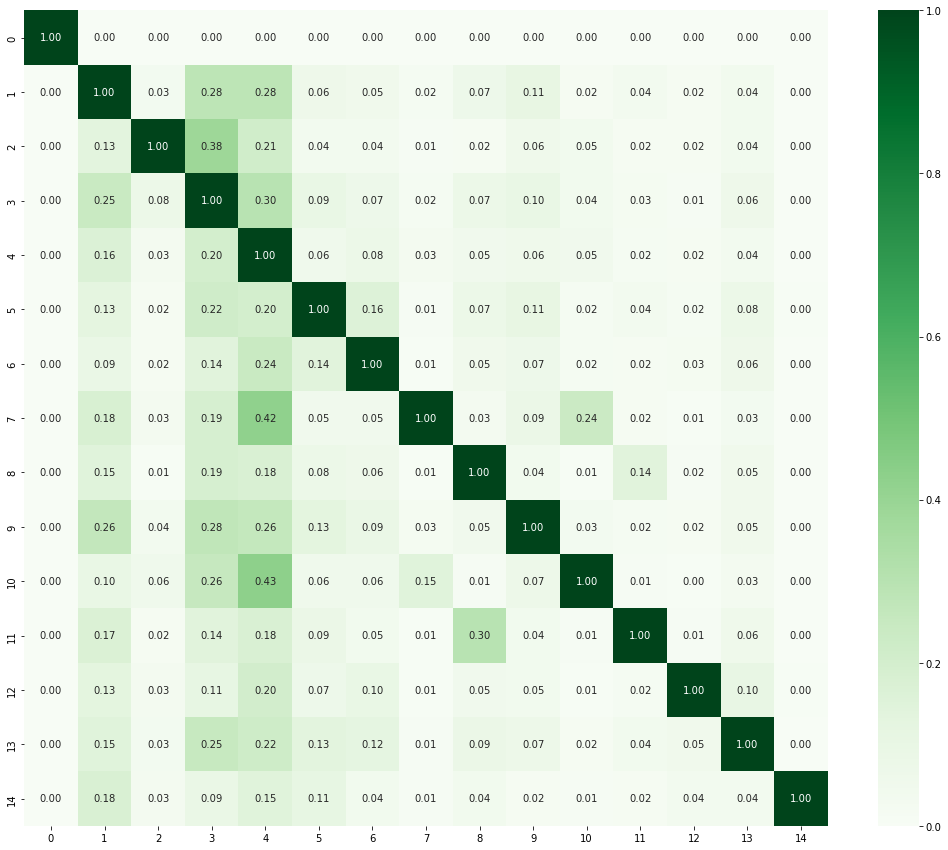

In [26]:
plt.figure(figsize=(18, 15))
confusion_metrics_percentage =  sns.heatmap(percentage,
            cmap="Greens",
            annot=True,
            label=True,
            fmt=".2f")
fig = confusion_metrics_percentage.get_figure()
#fig.savefig("Multi_Label_Co-occurence_Metrics.png") 
plt.show();